In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, precision_score, recall_score,
                            average_precision_score, roc_auc_score,
                            f1_score, matthews_corrcoef)
from sklearn.model_selection import train_test_split

import xgboost as xgb

## Dataset Location: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [87]:
df = pd.read_csv('credit_card.csv')

In [88]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## In machine learning, there are traditionally two main types of modelling approaches:
## - Supervised and Un-Supervised.
- In this project we are going to use Supervised learning (data has label)
- Classification - predict a category value i.e. is fraud yes/no. That means it is a binary (yes/no) classification
## Fraud detection is typically a supervised, binary classification problem, but unsupervised learning (clustering) can be used

In [91]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Partition data into a dataset:

- that can be used for training of the model and
- a secondary set that can be used to evaluate the effectiveness of the model after training

In [93]:
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

## Model vadiation

- Train set which our model learns from
- Test set which is used to evaluate the effectiveness of the model after training is complete
- Often a 80/20 or 90/10 split depending on the amount of data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (227845, 28)
X_test: (56962, 28)
y_train: (227845,)
y_test: (56962,)


## Confusion Matrix
- Acts as a cross section between the ground truth and the predictions that the trained model makes
- In a binary classification context, the confusion matrix reports on the classification performance of the model:
    - True negative - actually non-fraudulent correctly classified as non-fraudulent
    - False positive - actually non-fraudulent but incorrectly classified as fraud
    - False negative - actually fraud but incorrectly classified as being non-fraudulent
    - True positive - actually fraud and correctly classified as fraud
- We're trying to detect fraud, so the "positive" relates to fraud while "negative" refers to non-fraudulent.
- "True" relates to correct predictions, whereas "false" refers to incorrect predictions.
- Many performance metrics are derived from the elements of the confusion matrix, therefore it is foundational for understanding how to measure performance for classification problems.

In [97]:
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression(class_weight={0:1, 1:50})

modellr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 50})

In [98]:
y_pred = modellr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
confusion_matrix(y_test, y_pred)

array([[56758,   106],
       [   11,    87]], dtype=int64)

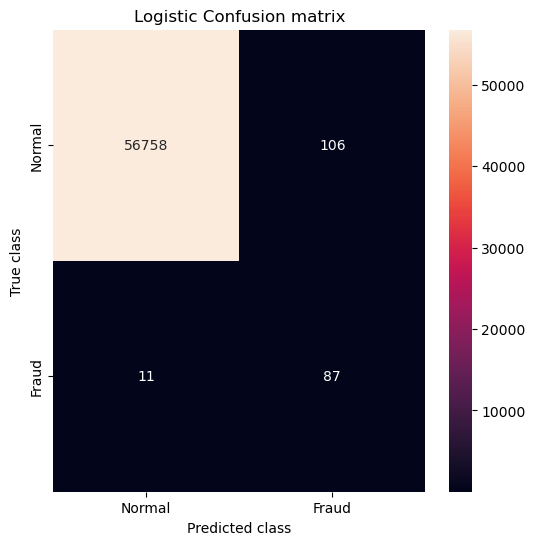

In [100]:
LABELS = ["Normal", "Fraud"]

conf_matrixlr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrixlr, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Logistic Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [101]:
# XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm.
# Gradient boosting is a supervised learning algorith, with attempts to accurately predict a target
# variable by combining the testimates of a set of simpler, weaker models.
# installing xgboost in wondows machine: %pip install xgboost the press ctrl + enter on the keyboard

# continue improving XGBoost now introduce the max_depth=5
# max_depth specifies the maximum depth to which each tree will be built.
# reduces overfitting

# https://xgboost.readthedocs.io/en/stable/python/index.html

In [102]:
model_xgb = xgb.XGBClassifier(max_depth=4, scale_pos_weight=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[56851,    13],
       [   16,    82]], dtype=int64)

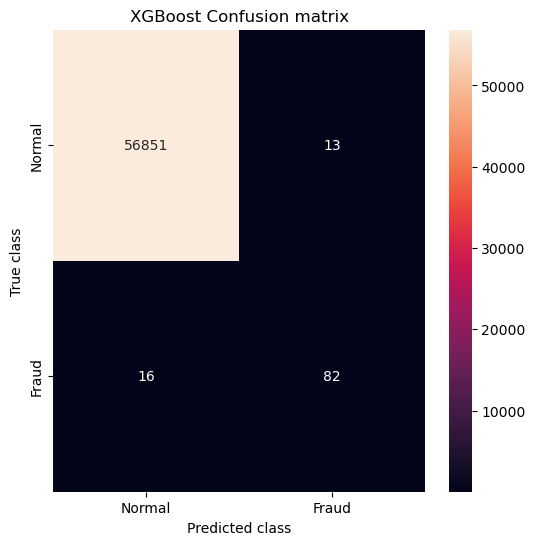

In [103]:
LABELS = ["Normal", "Fraud"]

confusion_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("XGBoost Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Performance Metrics for Fraud Detection

- Implementing Performance Metrics in scikit-learn

In [105]:
# Precision is the propotion of correctly predicted fraudulent instances among all instances predicted as fraud
# TP / (TP + FP)
# e.g. 42 / 42 + 8

precision_score(y_test, y_pred)

0.8631578947368421

In [106]:
# Recall is the proportion of the fradulent instances that are successfully predicted
# TP / (TP + FN)
# e.g. 42 / 42 + 7

recall_score(y_test, y_pred)

0.8367346938775511

In [107]:
# F1_score is the harmonic balance of precision and recall
# F = 2 * (Precision * Recall) / (Precision * Recall)
# F = 2 * (0.84 * 0.857) / (0.84 * 0.857)

f1_score(y_test, y_pred)

0.8497409326424872

In [108]:
# AUROC / AUC = Area under the Reciever Operating Characteristics curve
# plot the TPR (Recall) and FPR at various classification threshold
# FPR = FP / FP + TN
# Good measure of overall performance of the model

roc_auc_score(y_test, y_pred)

0.9182530391166033

In [109]:
# AUPROC = Area under the Precision-Recal curve
# Better alternative to AUC as does include TN which influences the score significantly in high imbalanced data
# calaculates the area under the curve at varioud classifications thresholds

average_precision_score(y_test, y_pred)

0.7225150458343516

In [110]:
# Classification report summarizes the classification metrics at the class and overall level
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## Understanding the Cost of Misclassification

In [112]:
# slice the confusion matrix results as an python object for logistic regression

print(conf_matrixlr[0][0])
print(conf_matrixlr[0][1])
print(conf_matrixlr[1][0])
print(conf_matrixlr[1][1])

56758
106
11
87


In [113]:
# slice the confusion matrix results as an python object for xgboost

print(confusion_matrix_xgb[0][0])
print(confusion_matrix_xgb[0][1])
print(confusion_matrix_xgb[1][0])
print(confusion_matrix_xgb[1][1])

56851
13
16
82


In [114]:
# costs defaults

cost_tn = 20
cost_fp = 200
cost_fn = 1000
cost_tp = 20

## Workout Total Cost of Fraud - Overall for the Model

- take each of the classifications from the matrix boxes that we have sliced to python object.
- apply the hard coded costing for each number of the classification and apply cost per each relative hard coded cost

In [116]:
# logistic regression total cost of fraud

total_cost_of_fraud_lr = (conf_matrixlr[0][0] * cost_tn) + (conf_matrixlr[0][1] * cost_fp) + (conf_matrixlr[1][0] * cost_fn) + (conf_matrixlr[1][1] * cost_tp)
total_cost_of_fraud_lr

1169100

In [117]:
tcf_score = (confusion_matrix_xgb[0][0] * cost_tn) + (confusion_matrix_xgb[0][1] * cost_fp) + (confusion_matrix_xgb[1][0] * cost_fn) + (confusion_matrix_xgb[1][1] * cost_tp)

tcf_score

1157260

In [118]:
# probability of being fraudulent
y_pred = model_xgb.predict_proba(X_test)[:,1]
y_pred

array([2.0150158e-06, 1.5804798e-06, 5.3438807e-06, ..., 1.1904124e-06,
       4.2283369e-05, 1.4733740e-05], dtype=float32)

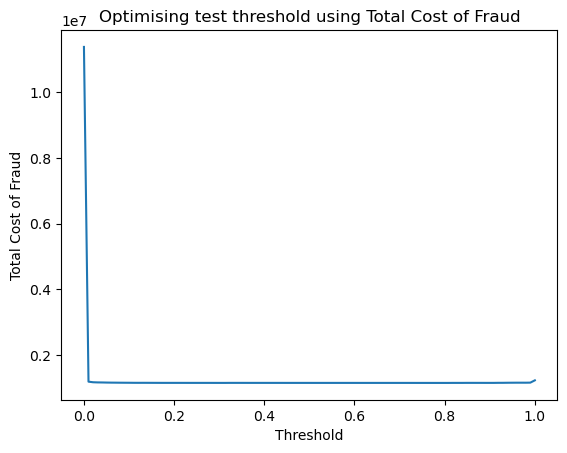

In [119]:
threshold_list = []
tcf_list = []
cost_tn = 20
cost_fp = 200
cost_fn = 1000
cost_tp = 20
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    y_pred_thresh = [1 if e > threshold else 0 for e in y_pred]
    threshold_list.append(threshold)

    # Total Cost of Fraud
    confusion_matrix_xgb = confusion_matrix(y_test, y_pred_thresh)
    tcf_score = (confusion_matrix_xgb[0][0] * cost_tn) + (confusion_matrix_xgb[0][1] * cost_fp) + (confusion_matrix_xgb[1][0] * cost_fn) + (confusion_matrix_xgb[1][1] * cost_tp)
    tcf_list.append(tcf_score)

# plot curve
threshold_df = pd.DataFrame(threshold_list, tcf_list).reset_index()
threshold_df.columns = ['TCF', 'Threshold']

plt.plot(threshold_df['Threshold'], threshold_df['TCF'])
plt.title("Optimising test threshold using Total Cost of Fraud")
plt.xlabel('Threshold')
plt.ylabel('Total Cost of Fraud')
plt.savefig('Optimising threshold using Total Cost of Fraud');
plt.show()

In [120]:
# if threshold = 0, then everything is fraud (lots of false positives which cost R20 each)
# if threshold = 1, then everything is non-fraudulent (quite a few missed cases of fraud which cost R200 each)
# optimal threshold for this model is around 50% (already well balanced)

threshold_df.sort_values(by='TCF', ascending=True)

,TCF,Threshold
80,1156540,0.808081
79,1156540,0.797980
78,1156540,0.787879
77,1156540,0.777778
76,1156540,0.767677
...,...,...
3,1172140,0.030303
2,1177000,0.020202
1,1195020,0.010101
99,1235280,1.000000


In [121]:
results_df = pd.DataFrame(y_pred, y_test).reset_index()
results_df.columns = ['Target variable', 'Score']
results_df.to_csv('results_df.csv')
#results_df.to_csv('api/results_df.csv')

In [122]:
# pip install streamlit